# **GUNITA - Programming Assignment 1**
<h2>Exploratory Data Analysis</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#load the dataset
dataset = 'spotify-2023.csv'
spotify = pd.read_csv(dataset, encoding='latin')

In [ ]:
spotify.head()

**<i><h2> 1. Overview of Dataset <h2><i>**

* How many rows and columns does the dataset contain? 

In [6]:
# Get total rows and columns
total_rows, total_columns = spotify.shape
print(f"The dataset contains \033[1m{total_rows}\033[0m rows and \033[1m{total_columns}\033[0m columns.\n")

The dataset contains 953 rows and 24 columns.



* What are the data types of each column? Are there any missing values?

In [7]:
# Create a table with data types and missing values
data_info = pd.DataFrame({
    'Column Name': spotify.columns,
    'Data Type': spotify.dtypes.values,
    'Missing Values': spotify.isnull().sum().values
})

# Display the table
display(data_info)

,Column Name,Data Type,Missing Values
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


The 'streams' column should be quantitative (`int64`) but is `object`. So we should convert it to perform numerical computations in that column. We can also notice that there are 50 values missing in `in_shazam_charts` column and 95 missing values in `key` column.

In [11]:
def convert_to_int64(columns: list):
    ''' Converts data type to np.int64 given the list of non-numeric columns.
        Coerces type conversion and drops the inconvertible rows. '''
    for col in columns:
        spotify[col] = pd.to_numeric(spotify[col], errors='coerce')
        spotify.dropna(subset=[col], inplace=True)
        spotify[col] = spotify[col].astype('int64')
        
# Convert `streams` to int64
obj_cols = ['streams']
convert_to_int64(obj_cols)

# Convert the dtypes to a DataFrame and display it as a table
dtypes_df = pd.DataFrame(spotify.dtypes, columns=['Data Type']).reset_index()
dtypes_df.columns = ['Column Name', 'Data Type']

# Display the table
display(dtypes_df)

,Column Name,Data Type
0,track_name,object
1,artist(s)_name,object
2,artist_count,int64
3,released_year,int64
4,released_month,int64
5,released_day,int64
6,in_spotify_playlists,int64
7,in_spotify_charts,int64
8,streams,int64
9,in_apple_playlists,int64


**<i><h2> 2. Basic Descriptive Statistics <h2><i>**

* What are the mean, median, and standard deviation of the `streams` column? 

In [15]:
# Summary statistics for streams
print("Summary Statistics for Streams Column:\n")
print(spotify['streams'].describe())

Summary Statistics for Streams Column:

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


* Mean is 5.14e+08
* Median is 2.91e+08
* Standard Deviation is 5.67e+08

* What is the distribution of `released_year` and `artist_count`? Are there any noticeable trends or outliers?

There are 27 outliers.


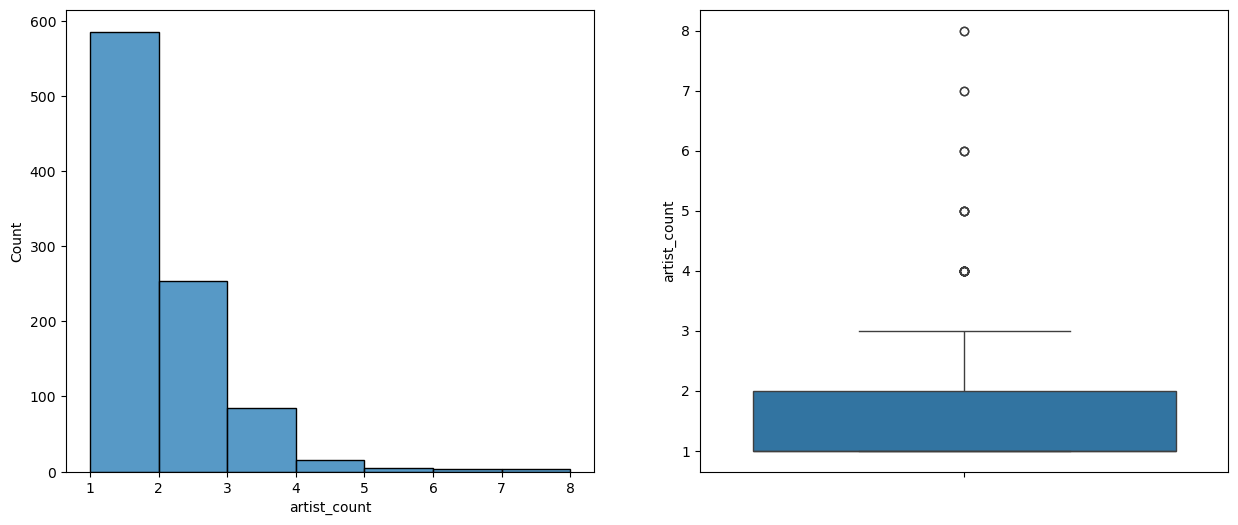

In [22]:
def hist_and_box(col, binwidth, df=spotify):
    ''' Creates a figure with a histogram and a boxplot for a specified column in a DataFrame. '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    sns.histplot(df[col], binwidth=binwidth, ax=axes[0]);
    sns.boxplot(df[col]);

# Histogram
hist_and_box('artist_count', binwidth=1)

# Number of `artist_count` outliers
outliers = spotify[spotify.artist_count > 3].shape[0]
print(f"There are {outliers} outliers.")

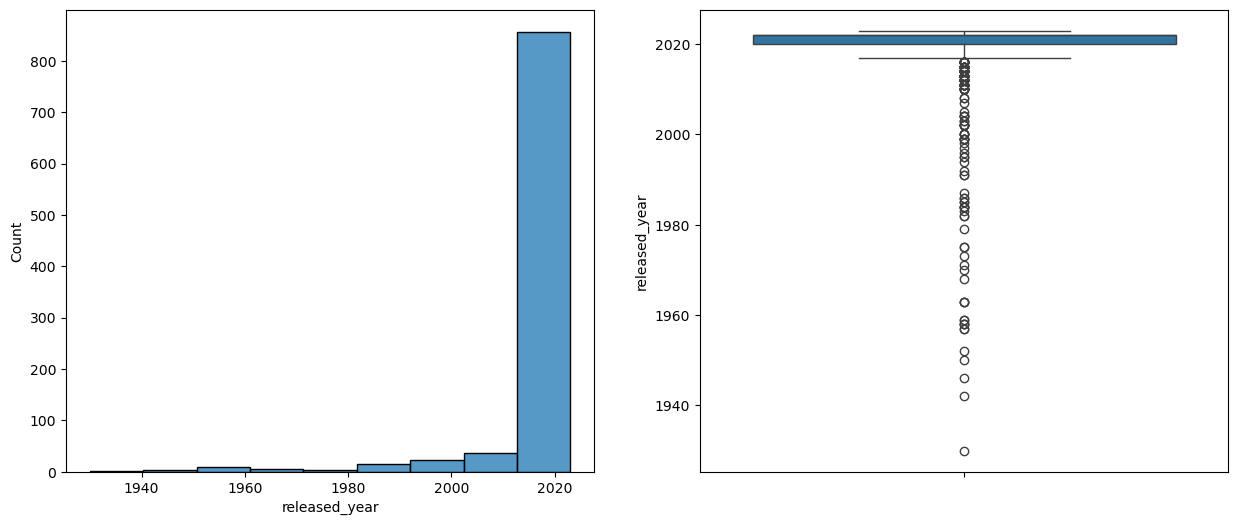

In [23]:
hist_and_box('released_year', binwidth=10)

**<i><h2> 3. Top Performers <h2><i>**

* Which track has the highest number of `streams`? Display the top 5 most streamed tracks. 

In [24]:
# Descending trend by streams
spotify_stream_desc = spotify.sort_values(by='streams', ascending=False)
spotify_stream_desc.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


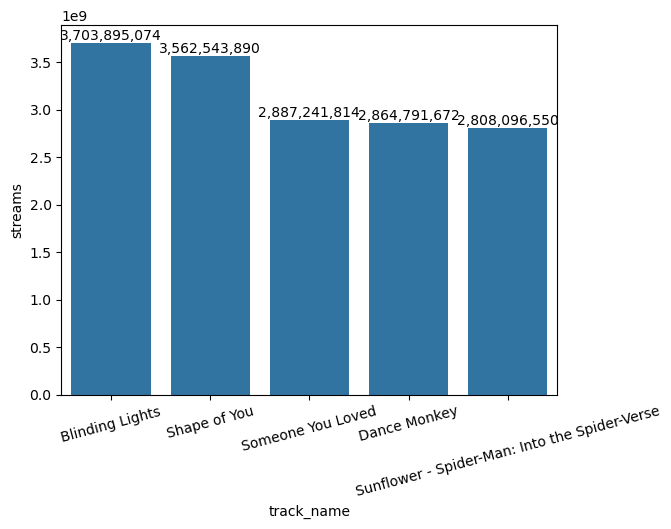

In [25]:
sns.barplot(x='track_name', y='streams', data=spotify_stream_desc.head())
plt.tick_params(axis='x', rotation=15);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

* The top 5 most streamed songs are:
1. Blinding Lights
2. Shape of You
3. Someone You Loved
4. Dance Monkey
5. Sunflower - Spider-Man: Into the Spider-Verse

* Who are the top 5 most frequent artists based on the number of tracks in the dataset? 

In [26]:
# Create new row or instance for multiple artists
# split by comma delimitation
spotify['artist(s)_name'] = spotify['artist(s)_name'].str.split(', ')

# explode by the `artist(s)_name` column
spotify_exploded = spotify.explode('artist(s)_name')

# change artist_count to 1
spotify_exploded.artist_count = 1
spotify_exploded.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,1,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,1,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15


In [27]:
# Most frequent artist
spotify_artist_frequent = spotify_exploded.groupby('artist(s)_name').sum('artist_count').sort_values(by='artist_count', ascending=False)
spotify_artist_frequent.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,,,,,,,,,,,,
Bad Bunny,40,80866,215,528,137562,675,23813527270,2016,2315,162,4958,2977,2028,2765,949,63,782,451
Taylor Swift,38,76781,278,594,137766,544,14630378183,1899,1945,58,4712,2279,1298,2096,1196,23,633,267
The Weeknd,37,74760,166,506,233079,555,23929760757,3023,2608,73,4353,2228,1615,2358,747,36,763,299
Kendrick Lamar,23,46491,112,319,113963,38,5555903581,703,296,0,2820,1528,1104,1341,945,1,375,542
SZA,23,46502,266,231,64502,114,6493011189,1098,1271,27,2690,1380,1099,1238,1108,42,447,221


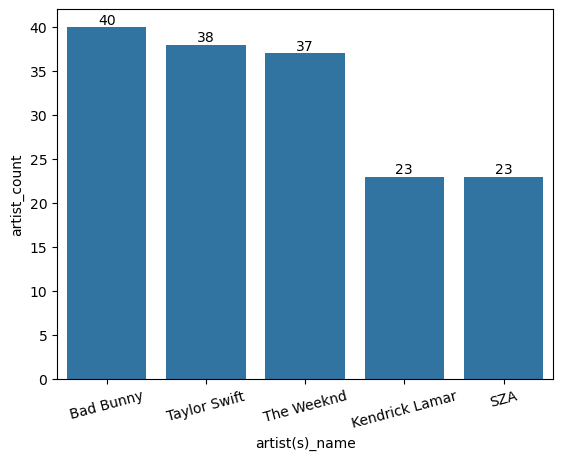

In [28]:
sns.barplot(x='artist(s)_name', y='artist_count', data=spotify_artist_frequent.reset_index().head())
plt.tick_params(axis='x', rotation=15);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

* The top 5 most artists based on number of tracks are:
1. Bad Bunny
2. Taylor Swift
3. The Weeknd
4. Kendrick Lamar
5. SZA

**<i><h2> 4. Temporal Trends <h2><i>**

* Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

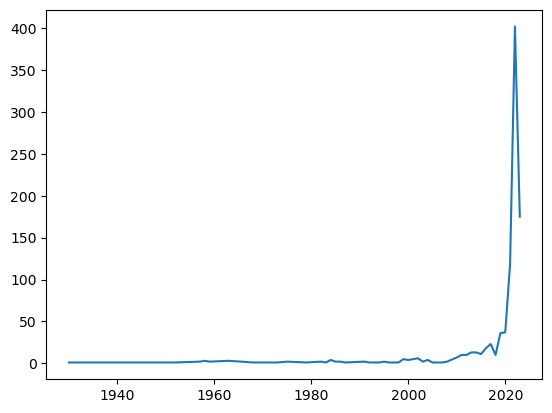

In [29]:
# Obtain the number of released songs per year
spotify_year = spotify.groupby('released_year').size()

# Create a line plot
plt.plot(spotify_year);

We don't really see any seasonality with this coarse perspective. However, we can see that the number of songs shoot up drastically. 

* Does  the  number  of  tracks  released  per  month  follow  any  noticeable  patterns?  Which month sees the most releases?

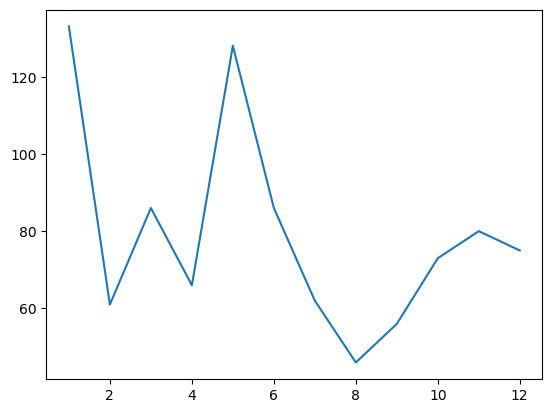

In [30]:
spotify_month = spotify.groupby('released_month').size()

plt.plot(spotify_month);

The total number of songs released throughout the first six months shows a pattern: more songs are released on odd months and less songs are released on even months. The highest number of songs is published in January and May, while the lowest amount occurs in August. 

**<i><h2> 5. Genre and Music Characteristics <h2><i>**

* Examine the correlation between `streams` and musical attributes like `bpm`, `danceability_%`, and `energy_%`. Which attributes seem to influence streams the most?

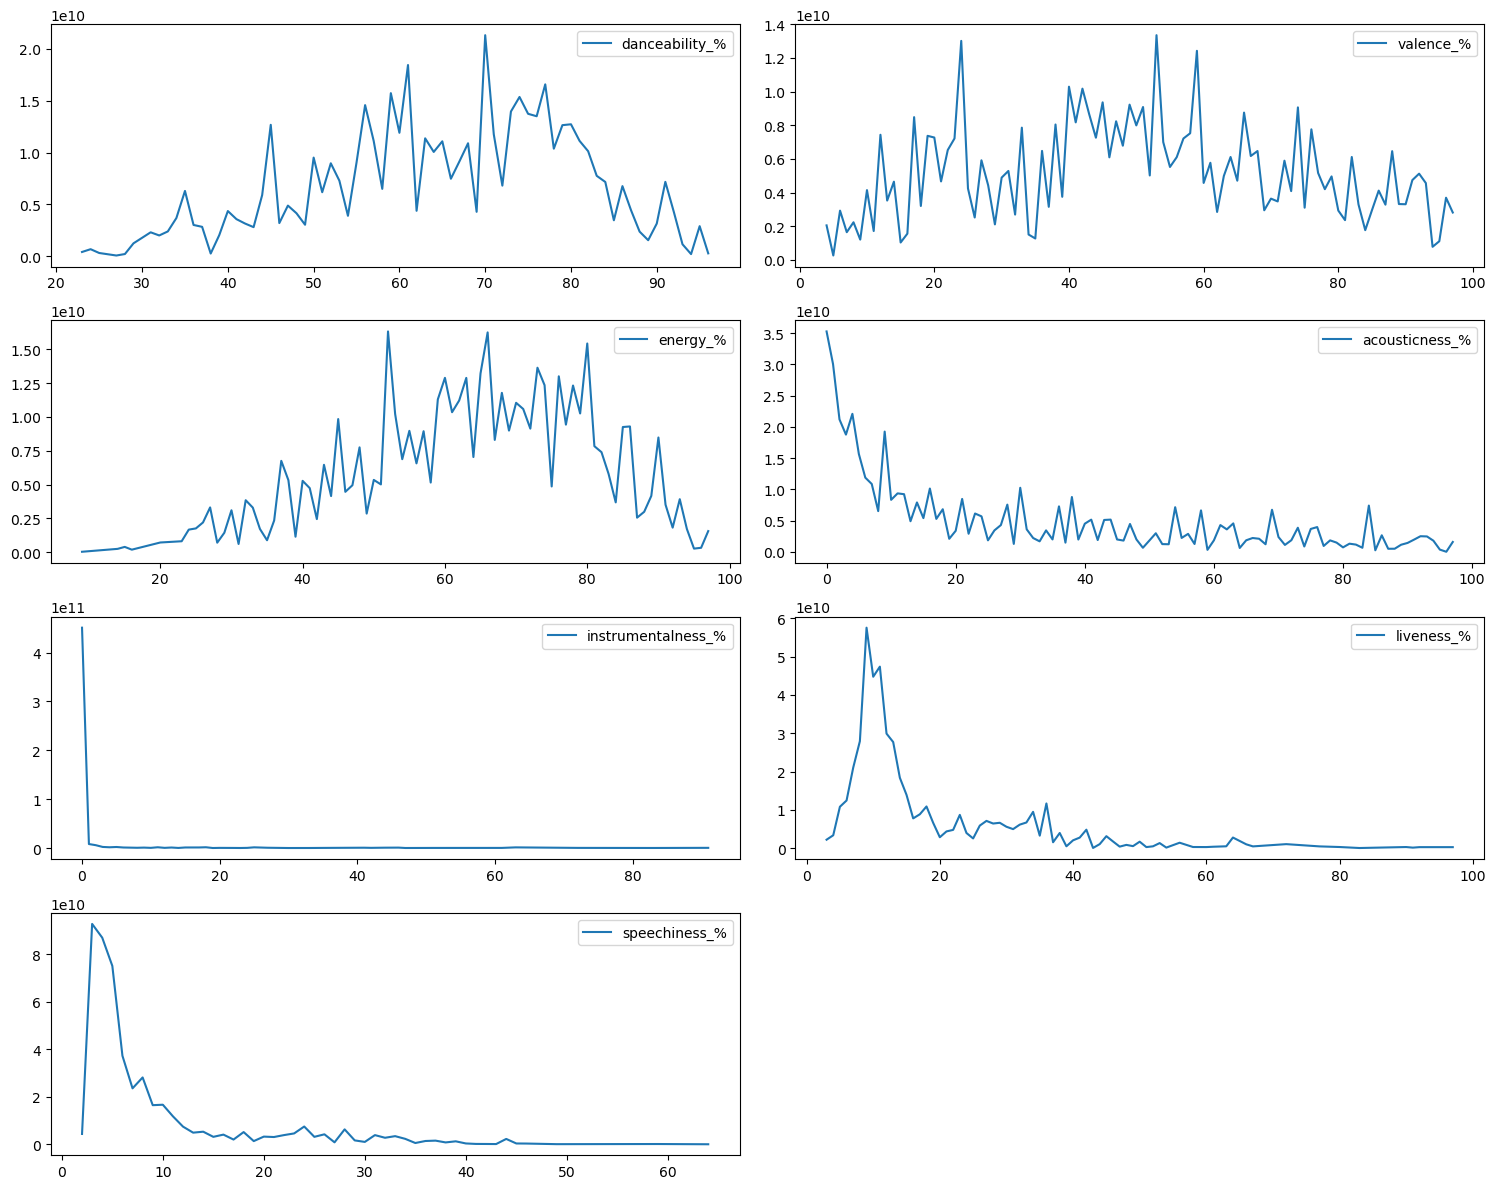

In [31]:
# target attributes
attrs = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# create multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

# flatten the subplots for easier indexing
axes = axes.flatten()

# loop through all the musical attributes
for ix, attr in enumerate(attrs):
    
    # get the sum of streams per category
    spotify_sub = spotify[['streams', attr]].groupby(attr).sum().sort_values(attr)
    
    # create a line plot
    axes[ix].plot(spotify_sub.index, spotify_sub['streams'], label=attr)
    
    # set the legend
    axes[ix].legend()

# remove extra subplots
for ax in axes[len(attrs):]:
    fig.delaxes(ax)
    
plt.tight_layout()
plt.show();

We can explain how streams relate to each musical attribute given the collection of plots. The extremes in terms of danceability indicate low support, however having between 60% and 80% indicates a sizable number of streams. The plot is somewhat unpredictable in terms of valence, but the density, which is roughly 50%, is primarily in the middle. Because the stream density is high, ranging from 60% to 80%, listeners prefer their music to have greater intensity. An increase in acousticness is correlated with a decrease in streams. An extremely low instrumentalness causes more streams to pool at 0%. The highest number of streams are displayed at 10% liveness, which subsequently drops off at 0% and 20%. Finally, 5% or less is the ideal speechiness in terms of number of streams.

* Is there a correlation between `danceability_%` and `energy_%`? How about `valence_%` and `acousticness_%`?

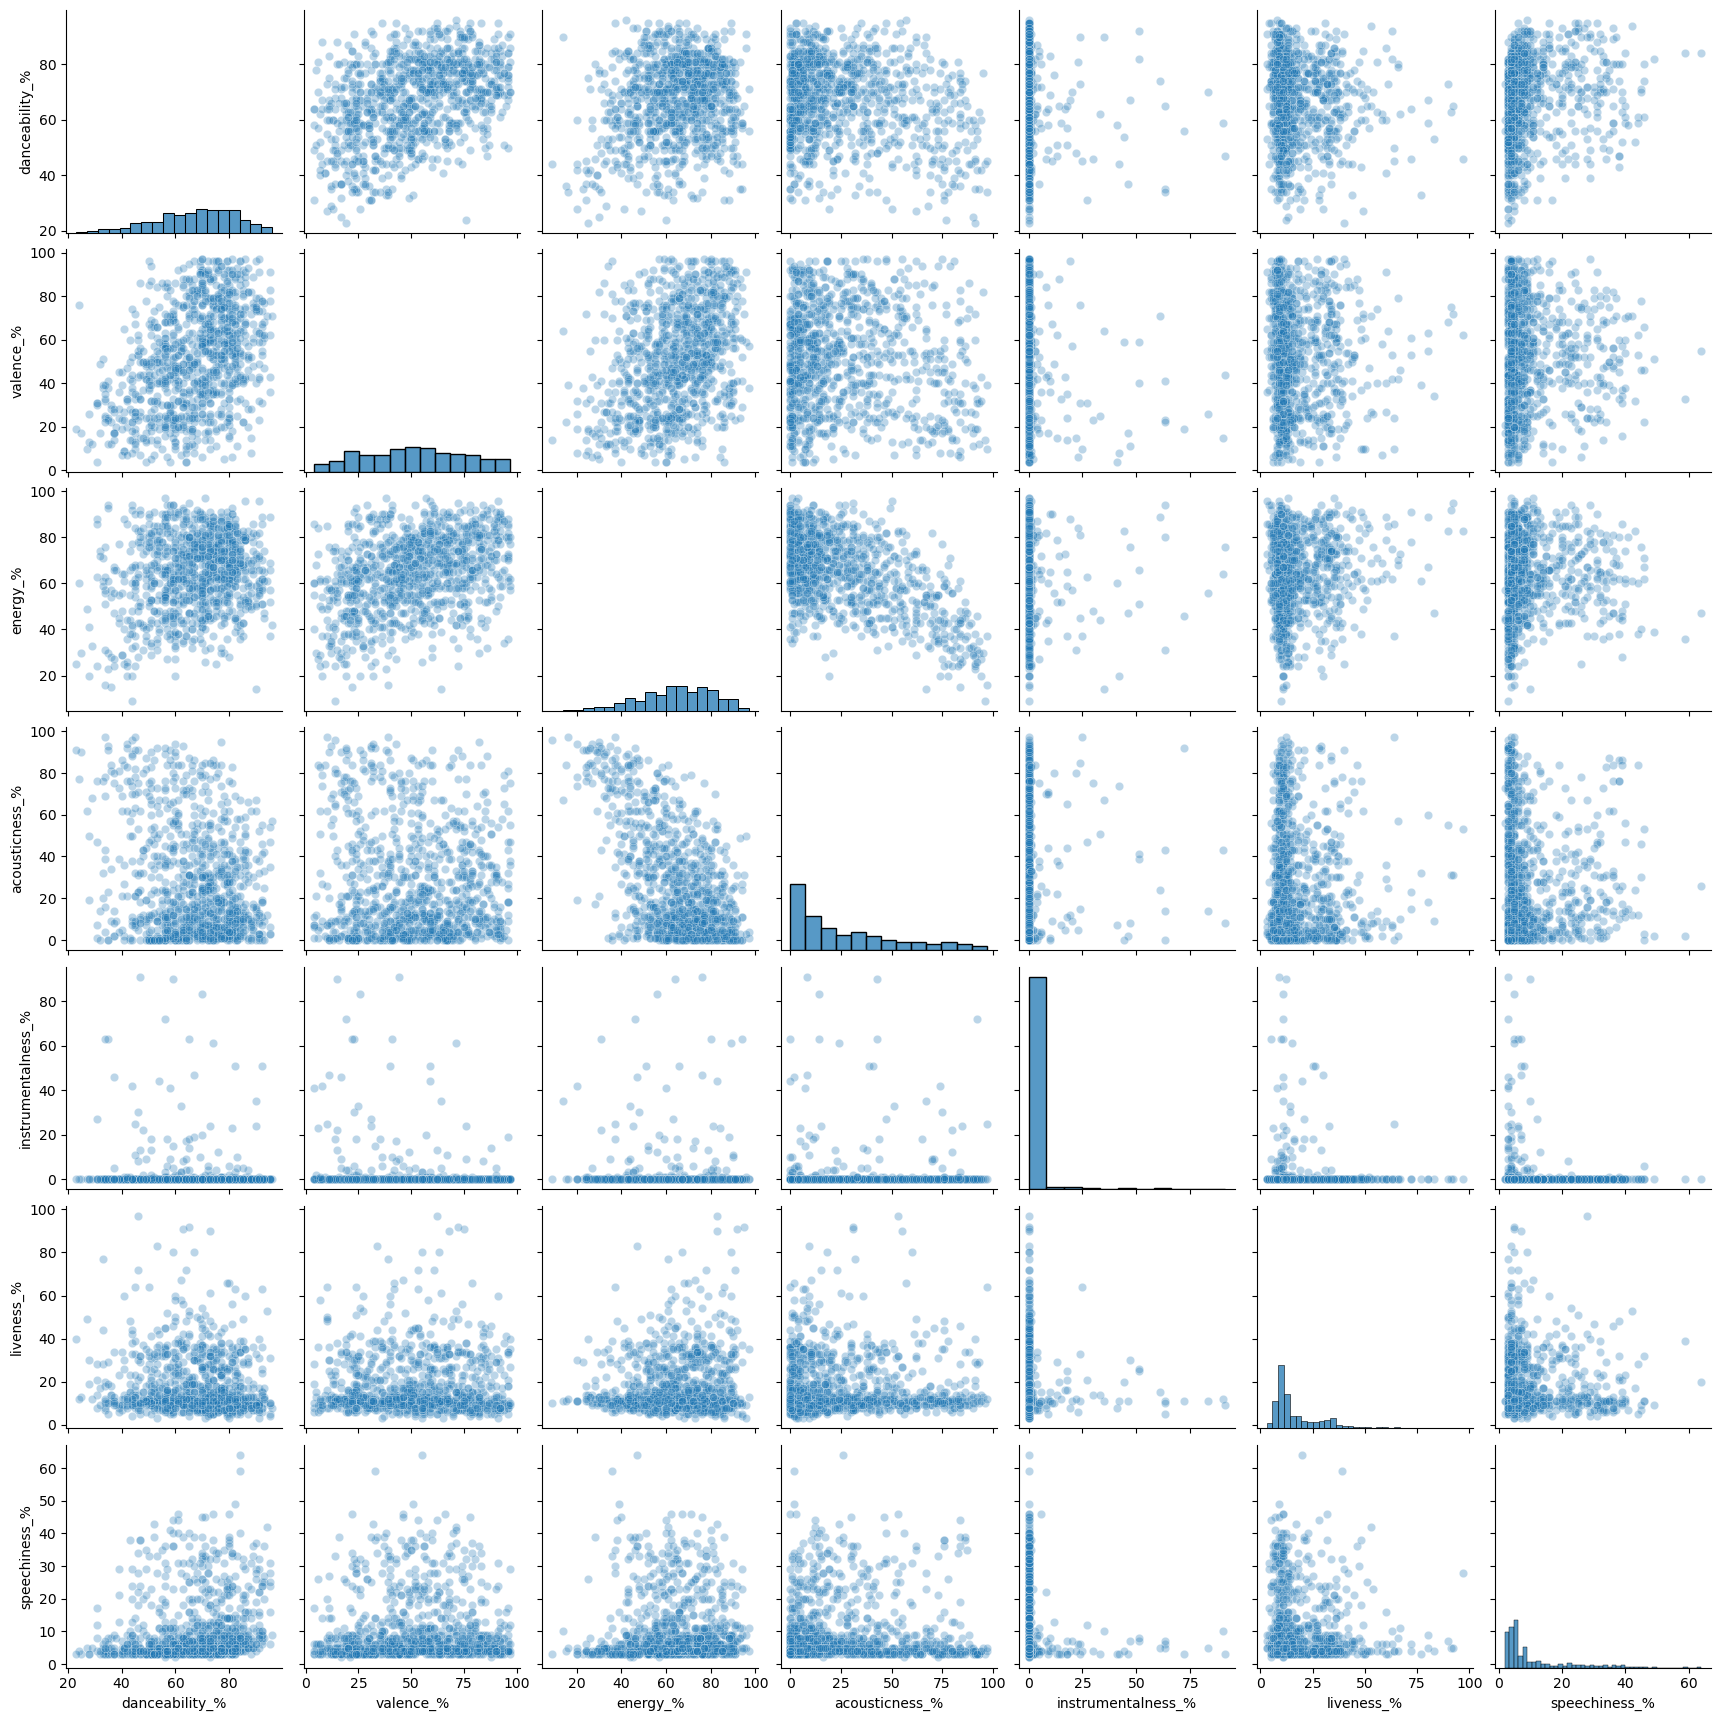

In [32]:
# create a pairplot using the musical attributes
spotify_attr = spotify[attrs]

# set the transparency to see the relationships better
sns.pairplot(spotify_attr, plot_kws={'alpha': 0.3});

Judging the plots, danceability and energy appear to be correlated, with a high energy level corresponding to a high danceability level. Danceability and valence have a more substantial connection. Additionally, the positive association between valence and energy is somewhat stronger. There is a noticeable adverse correlation between acousticness and energy. It's challenging to determine the association between other musical aspects because the majority of the data are skewed. 

**<i><h2> 6. Platform Popularity <h2><i>**

* How  do  the  numbers  of  tracks  in  `spotify_playlists`,  `spotify_charts`,  and  `apple_playlists` compare? Which platform seems to favor the most popular tracks? 

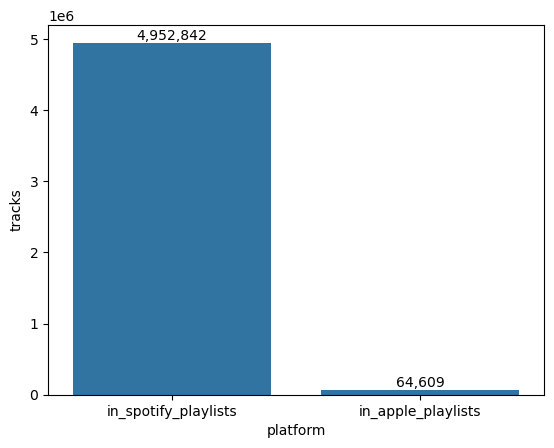

In [34]:
# target platforms
playlists = ['in_spotify_playlists', 'in_apple_playlists',]

# getting the sum of tracks per playlist platform
platform_tracks = [spotify[playlist].sum() for playlist in playlists]

# creating a DataFrame
spotify_playlists = pd.DataFrame({'platform': playlists,
                                 'tracks': platform_tracks})

sns.barplot(x='platform', y='tracks', data=spotify_playlists);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

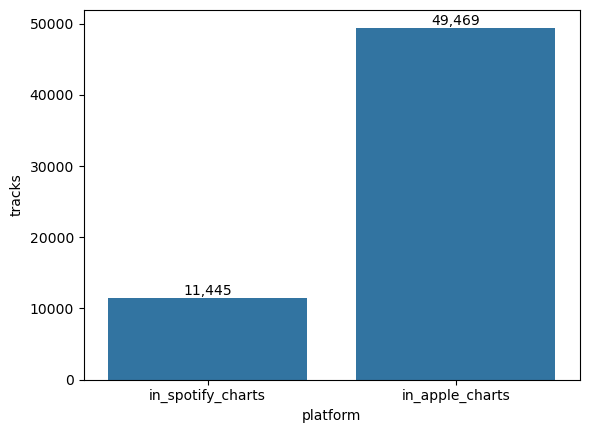

In [35]:
# target platforms
charts = ['in_spotify_charts', 'in_apple_charts']

# getting the sum of tracks per playlist platform
platform_tracks = [spotify[chart].sum() for chart in charts]

# creating a DataFrame
spotify_charts = pd.DataFrame({'platform': charts,
                                 'tracks': platform_tracks})

sns.barplot(x='platform', y='tracks', data=spotify_charts);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

The number of tracks in `in_spotify_playlists` is significantly higher than `in_apple_playlists`. On the other hand, the number of tracks in `in_apple_charts` are much higher than `in_spotify_charts`.

**<i><h2> 7. Advanced Analysis <h2><i>**

* Based on the `streams` data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)? 

In [36]:
# Obtaining the sum of streams per key
spotify_key = spotify[['key', 'streams']].groupby('key').sum('streams').sort_values(by='streams', ascending=False)

# reset index and assign columns to `key` and `streams`
spotify_key.reset_index(inplace=True)
spotify_key.columns = ['key', 'streams']

spotify_key

,key,streams
0,C#,72513629843
1,G,43449542493
2,G#,43398979639
3,D,42891570295
4,B,42067184540
5,F,41691728620
6,F#,38132510024
7,E,35804825731
8,A#,31491099814
9,A,30254264458


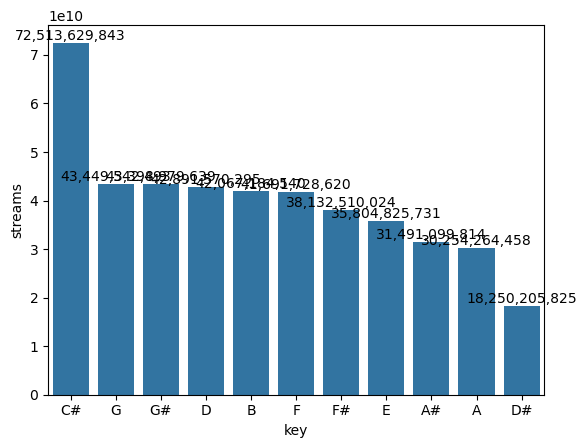

In [37]:
sns.barplot(x='key', y='streams', data=spotify_key);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

This shows us how many streams have been assigned a key. It appears that `key=C#` is prevalent over all other keys, but in order to determine the average number of streams per key, we must normalize this using the number of songs that contain `key=C#`.

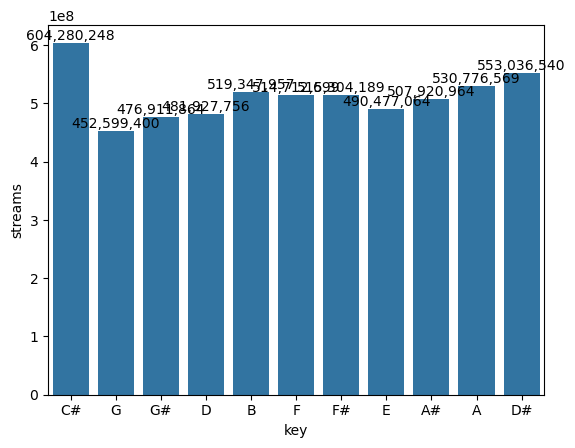

In [38]:
# convert streams to average stream per key
spotify_key.streams = spotify_key.streams / spotify.key.value_counts().values

# create a barplot
sns.barplot(x='key', y='streams', data=spotify_key);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

We can observe that there are roughly the same amount of streams for every number of keys by finding the average number of streams per key. Still, there has been an insignificant rise in the quantity of streams for C# music.

In [41]:
# Obtaining the sum of streams per mode
spotify_mode = spotify[['mode', 'streams']].groupby('mode').sum('streams').sort_values(by='streams', ascending=False)

# reset index and assign columns to `mode` and `streams`
spotify_mode.reset_index(inplace=True)
spotify_mode.columns = ['mode', 'streams']

spotify_mode

,mode,streams
0,Major,293623203541
1,Minor,195835625001


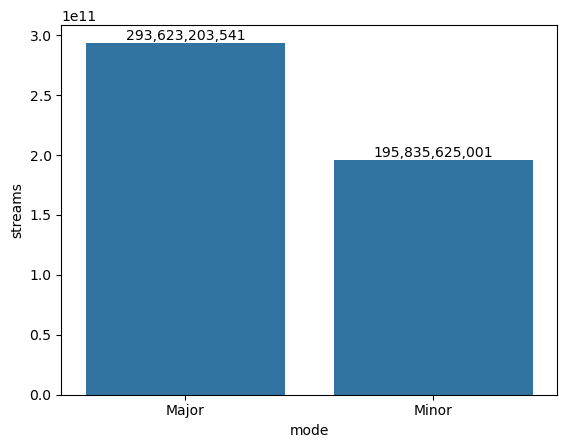

In [40]:
sns.barplot(x='mode', y='streams', data=spotify_mode);

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        bar.get_height(),  # Y position (height of bar)
        f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
        ha='center', va='bottom', fontsize=10  # Centered text
    )
    
# Show the plot
plt.show()

* Do  certain  genres  or  artists  consistently  appear  in  more  playlists  or  charts?  Perform  an analysis to compare the most frequently appearing artists in playlists or charts. 

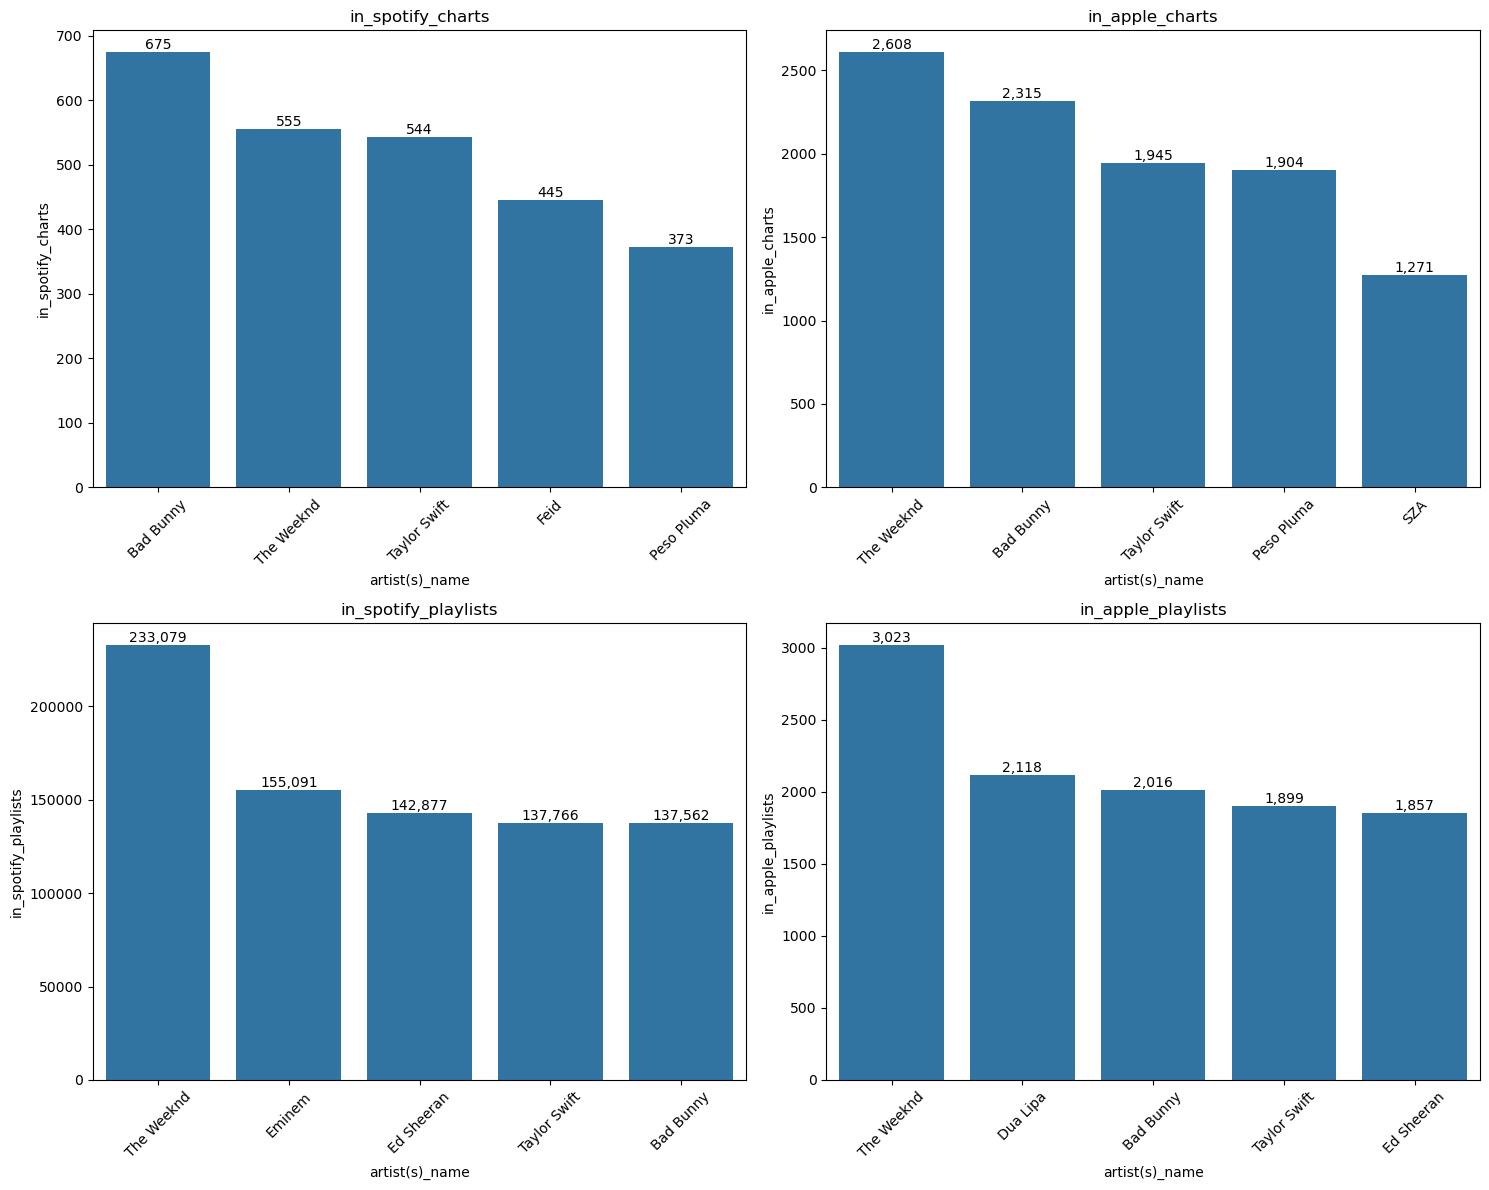

In [45]:
# We will be using the spotify_exploded DataFrame to segment each artist as a lone instance
platforms = ['in_spotify_charts', 'in_apple_charts', 'in_spotify_playlists', 'in_apple_playlists']

# create multiple subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))

# flatten axes for easier indexing
axes = axes.flatten()

# iterate through the platforms
for ix, platform in enumerate(platforms):
    
    # get the sum by artist name
    spotify_sub = spotify_exploded.groupby('artist(s)_name').sum(platform).sort_values(platform, ascending=False).reset_index()
    
    plt.title(platform)
    # plot with a bar plot per platform
    sns.barplot(x='artist(s)_name', y=platform, data=spotify_sub.head(), ax=axes[ix])

 # Set title for each subplot
    axes[ix].set_title(platform)

    # Add numbers on top of each bar
    for bar in axes[ix].patches:
        axes[ix].text(
            bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height(),  # Y position (height of bar)
            f'{int(bar.get_height()):,}',  # Text to display, formatted with commas
            ha='center', va='bottom', fontsize=10  # Centered text
        )

    # Rotate x-axis labels for better readability
    axes[ix].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()